In [12]:
%pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [13]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import time as tm
import random as rdm
import matplotlib.pyplot as plt

In [14]:
# define os domínios das entradas e saídas
fila_LO = ctrl.Antecedent(np.arange(0,101,1), 'fila_LO')
fila_NS = ctrl.Antecedent(np.arange(0,101,1), 'fila_NS')
tempo_semaforo = ctrl.Consequent(np.arange(30,120.5,0.5), 'tempo_semaforo')

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


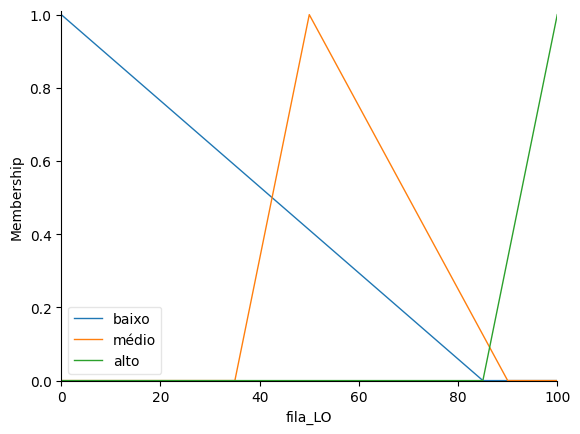

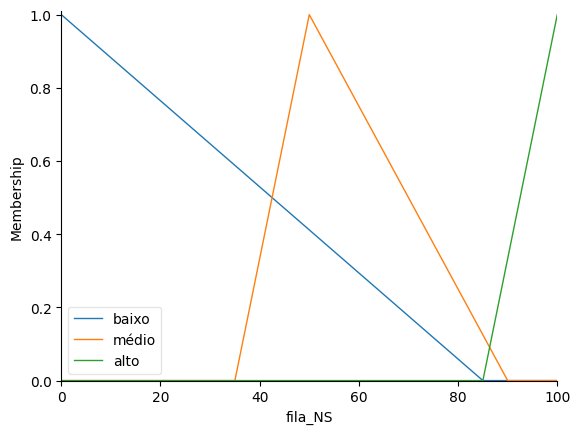

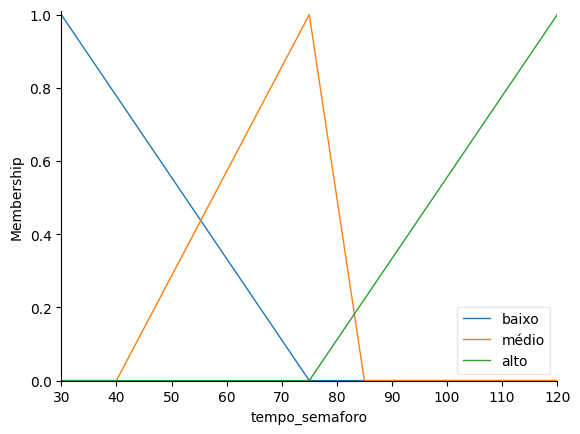

In [15]:
# define as funções de pertinência
# fila_LO
fila_LO['baixo'] = fuzz.trimf(fila_LO.universe, [0,0,85])
fila_LO['médio'] = fuzz.trimf(fila_LO.universe, [35,50,90])
fila_LO['alto'] = fuzz.trimf(fila_LO.universe, [85,100,100])

# fila_NS
fila_NS['baixo'] = fuzz.trimf(fila_NS.universe, [0,0,85])
fila_NS['médio'] = fuzz.trimf(fila_NS.universe, [35,50,90])
fila_NS['alto'] = fuzz.trimf(fila_NS.universe, [85,100,100])

# tempo_semaforo
tempo_semaforo['baixo'] = fuzz.trimf(tempo_semaforo.universe, [30,30,75])
tempo_semaforo['médio'] = fuzz.trimf(tempo_semaforo.universe, [40,75,85])
tempo_semaforo['alto'] = fuzz.trimf(tempo_semaforo.universe, [75,120,120])

fila_LO.view()
fila_NS.view()
tempo_semaforo.view()

In [16]:
# definir as regras

regra1 = ctrl.Rule(fila_LO['alto'] & (fila_NS['baixo'] | fila_NS['médio']), tempo_semaforo['baixo'])
regra2 = ctrl.Rule(fila_LO['alto'] & fila_NS['alto'], tempo_semaforo['médio'])
regra3 = ctrl.Rule(fila_LO['médio'], tempo_semaforo['médio'])
regra4 = ctrl.Rule(fila_LO['baixo'] & fila_NS['baixo'], tempo_semaforo['baixo'])
regra5 = ctrl.Rule(fila_LO['baixo'] & fila_NS['médio'], tempo_semaforo['médio'])
regra6 = ctrl.Rule(fila_LO['baixo'] & fila_NS['alto'], tempo_semaforo['alto'])

In [17]:
# Agregando as regras e defuzificando
semaforo_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6])
semaforo_system = ctrl.ControlSystemSimulation(semaforo_ctrl)

In [18]:
def semaphore_time(qtd_c1, qtd_c2):
    semaforo_system.input['fila_LO'] = qtd_c1
    semaforo_system.input['fila_NS'] = qtd_c2
    semaforo_system.compute()
    return semaforo_system.output['tempo_semaforo']

46.8014705882353


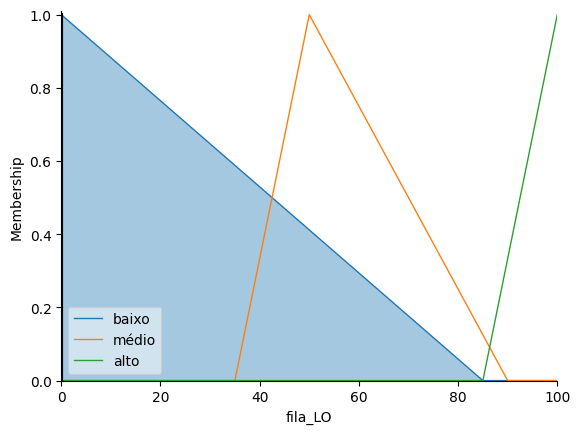

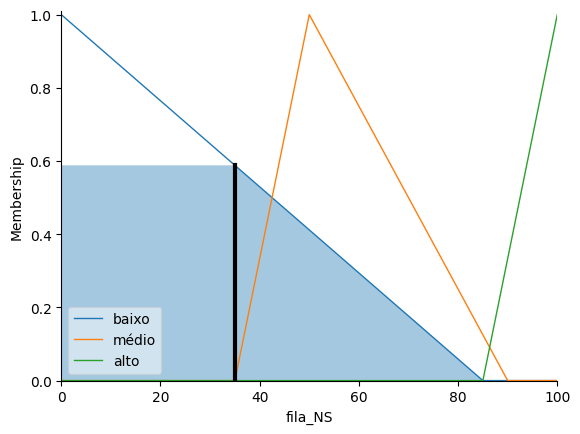

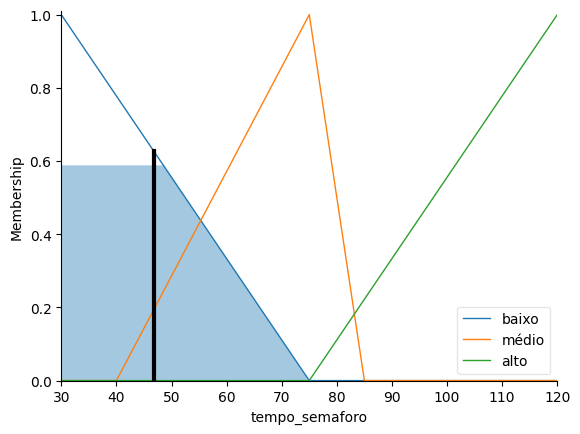

In [19]:
print(semaphore_time(0,35))
fila_LO.view(sim=semaforo_system)
fila_NS.view(sim=semaforo_system)
tempo_semaforo.view(sim=semaforo_system)

In [20]:
class CarQueue:
    q = 0
    probInc = [0,0,0,1,1,1,2,2]
    probDec = [2,2,2,2,1]
    def increment(self):
        self.q = self.q + rdm.choice(self.probInc)
    def decrement(self):
        if self.q >= 2:
            self.q = self.q - rdm.choice(self.probDec)
        else:
            self.q = 0

In [32]:
c1 = CarQueue()
c2 = CarQueue()

T = [0]
C1 = [0]
C2 = [0]
S = []

LO_verde = True
counter = semaphore_time(0,0)
S.append(counter)
cycle_counter = 0
while(cycle_counter < 50):
    if LO_verde:
        c1.decrement()
        if (c1.q > 1):
            c1.increment()
        c2.increment()
    else:
        c2.decrement()
        if (c2.q > 1):
            c2.increment()
        c1.increment()
    counter = counter - 1
    T.append(T[-1] + 1)
    C1.append(c1.q)
    C2.append(c2.q)
    S.append(counter)
    if counter <= 0:
        if LO_verde:
            counter = semaphore_time(c1.q, c2.q)
        else:
            counter = semaphore_time(c2.q, c1.q)
        LO_verde = not LO_verde
        cycle_counter += 1

print(len(T), len(C1), len(C2), len(S))

3029 3029 3029 3029


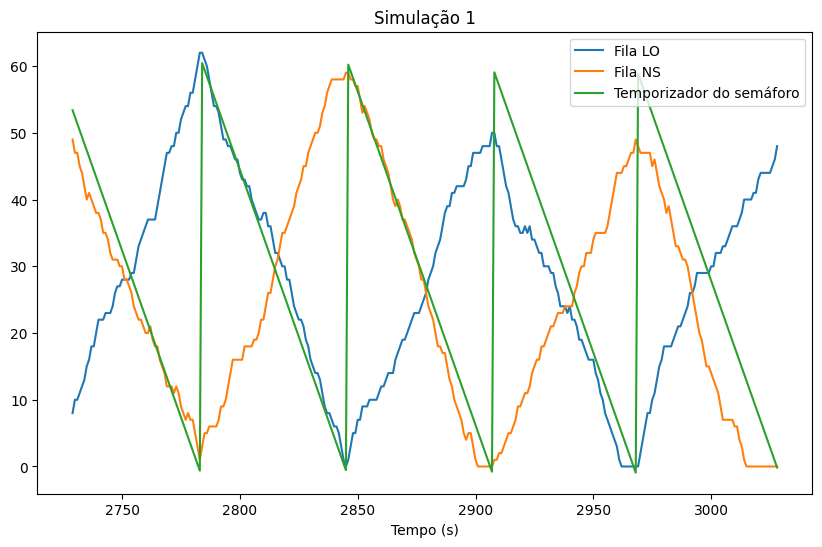

In [33]:
# Create a single plot
plt.figure(figsize=(10, 6))

# Plot the first curve
plt.plot(T[-300:], C1[-300:], label='Fila LO')

# Plot the second curve
plt.plot(T[-300:], C2[-300:], label='Fila NS')

# Plot the third curve
plt.plot(T[-300:], S[-300:], label='Temporizador do semáforo')

# Add labels and a legend
plt.xlabel('Tempo (s)')
plt.title('Simulação 1')
plt.legend()

# Show the plot
plt.show()